# 1. FlowChart

In [3]:
def Print_values(a, b, c):
    
    # 1 把 a, b, c 放入列表中并从大到小排序
    sorted_values = sorted([a, b, c], reverse=True)
    
    # 2️ 依次赋值给 x, y, z
    x, y, z = sorted_values
    
    # 3️  计算 x + y - 10z
    result = x + y - 10 * z
    
    # 4️ 打印结果
    print(f"x = {x}, y = {y}, z = {z}")
    print(f"Computed result (x + y - 10z) = {result}")

In [5]:
import random
# 生成三个 1~100 之间的随机整数
a = random.randint(1, 100)
b = random.randint(1, 100)
c = random.randint(1, 100)

# 调用函数
Print_values(a, b, c)
Print_values(5, 15, 10)

x = 88, y = 49, z = 7
Computed result (x + y - 10z) = 67
x = 15, y = 10, z = 5
Computed result (x + y - 10z) = -25


# 2. Continuous celing function

In [5]:
import math

def F(x):
    # 基本情况（递归终止条件）
    if x == 1:
        return 1
    else:
        return F(math.ceil(x / 3)) + 2 * x

In [6]:
for i in [1, 2, 3, 4, 9, 10]:
    print(f"F({i}) = {F(i)}")

F(1) = 1
F(2) = 5
F(3) = 7
F(4) = 13
F(9) = 25
F(10) = 33


# 3. Dice Rolling


 当总和 x = 35 时，出现的组合数最多，为 4,395,456 种。

Group 1          Group 2          Group 3          Group 4          Group 5         
x=10: 1          x=11: 10         x=12: 55         x=13: 220        x=14: 715       
x=15: 2,002      x=16: 4,995      x=17: 11,340     x=18: 23,760     x=19: 46,420    
x=20: 85,228     x=21: 147,940    x=22: 243,925    x=23: 383,470    x=24: 576,565   
x=25: 831,204    x=26: 1,151,370  x=27: 1,535,040  x=28: 1,972,630  x=29: 2,446,300 
x=30: 2,930,455  x=31: 3,393,610  x=32: 3,801,535  x=33: 4,121,260  x=34: 4,325,310 
x=35: 4,395,456  x=36: 4,325,310  x=37: 4,121,260  x=38: 3,801,535  x=39: 3,393,610 
x=40: 2,930,455  x=41: 2,446,300  x=42: 1,972,630  x=43: 1,535,040  x=44: 1,151,370 
x=45: 831,204    x=46: 576,565    x=47: 383,470    x=48: 243,925    x=49: 147,940   
x=50: 85,228     x=51: 46,420     x=52: 23,760     x=53: 11,340     x=54: 4,995     
x=55: 2,002      x=56: 715        x=57: 220        x=58: 55         x=59: 10        
x=60: 1                  

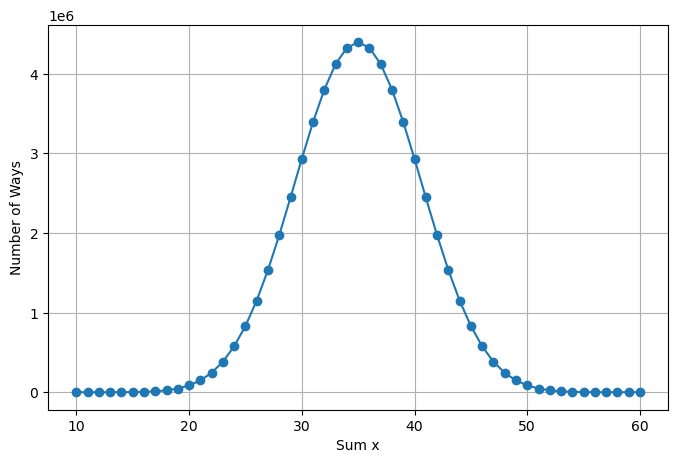

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =============================
# 3.1 定义函数：计算得到指定和 x 的方式数
# =============================
def Find_number_of_ways(n, x):
    """
    使用动态规划计算：
    投 n 个骰子（每个骰子 1~6 点）时，
    总点数为 x 的组合数。
    """
    dp = np.zeros((n + 1, x + 1), dtype=int)
    dp[0][0] = 1

    for i in range(1, n + 1):
        for j in range(1, x + 1):
            for k in range(1, 7):
                if j - k >= 0:
                    dp[i][j] += dp[i - 1][j - k]
    return dp[n][x]


# =============================
# 3.2 主程序
# =============================
n = 10  # 骰子数
x_values = list(range(10, 61))
Number_of_ways = [Find_number_of_ways(n, x) for x in x_values]

# 找出最多的情况
max_ways = max(Number_of_ways)
max_x = x_values[Number_of_ways.index(max_ways)]

print(f"\n 当总和 x = {max_x} 时，出现的组合数最多，为 {max_ways:,} 种。\n")

# =============================
# 每行 3 组 (x, ways)，并左对齐输出
# =============================
data = [f"x={x:<2}: {ways:<10,}" for x, ways in zip(x_values, Number_of_ways)]
rows = [data[i:i+5] for i in range(0, len(data), 5)]

df = pd.DataFrame(rows, columns=["Group 1", "Group 2", "Group 3","Group 4","Group 5",])

# 设置 DataFrame 左对齐打印
with pd.option_context('display.colheader_justify', 'left'):
    print(df.to_string(index=False, justify='left'))

# =============================
# 绘图
# =============================
plt.figure(figsize=(8,5))
plt.plot(x_values, Number_of_ways, marker='o', linewidth=1.5)
plt.xlabel("Sum x")
plt.ylabel("Number of Ways")
plt.grid(True)
plt.show()


# 4. Dynamic programming

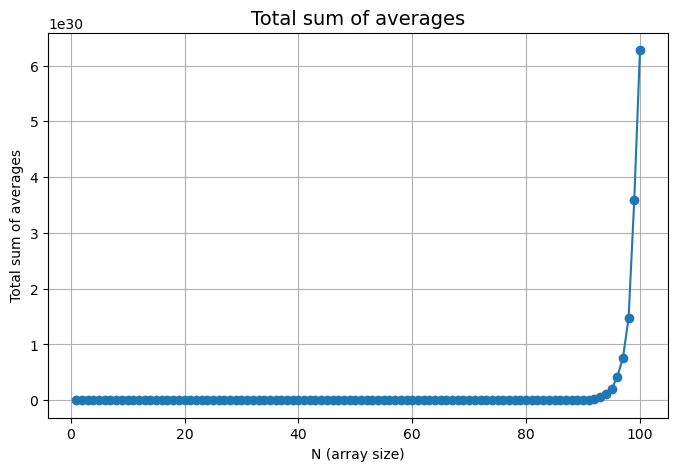

观察：
随着 N 增大，总和快速上升，但计算速度极快。
算法复杂度从指数级 (2^N) 降到线性级 (N)。


In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt

# =============================
# 4.1 随机整数生成函数
# =============================
def Random_integer(N):
    """随机生成长度为 N 的整数数组，范围 [0,10]"""
    return np.random.randint(0, 11, N)

# =============================
# 4.2 数学优化后的求和函数（O(N)）
# =============================
def Sum_averages(arr):
    """
    使用组合数学优化，避免枚举所有子集。
    返回所有非空子集平均值的总和。
    """
    N = len(arr)
    fN = sum(math.comb(N - 1, k - 1) / k for k in range(1, N + 1))
    return fN * np.sum(arr)

# =============================
# 4.3 主程序
# =============================
Total_sum_averages = []

for N in range(1, 101):
    arr = Random_integer(N)
    total = Sum_averages(arr)
    Total_sum_averages.append(total)

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), Total_sum_averages, marker='o', linewidth=1.5)
plt.title("Total sum of averages", fontsize=14)
plt.xlabel("N (array size)")
plt.ylabel("Total sum of averages")
plt.grid(True)
plt.show()

# 结果描述
print("观察：")
print("随着 N 增大，总和快速上升，但计算速度极快。")
print("算法复杂度从指数级 (2^N) 降到线性级 (N)。")


# 5. Path counting

In [21]:
import numpy as np

# =============================
# 5.1 创建随机矩阵函数
# =============================
def Create_matrix(N, M):
    """
    创建一个 N 行 M 列的矩阵。
    - 左上角 (0,0) 和右下角 (N-1,M-1) 填 1。
    - 其他位置随机填 0 或 1。
    """
    matrix = np.random.randint(0, 2, size=(N, M))  # 0 或 1
    matrix[0, 0] = 1           # 起点
    matrix[-1, -1] = 1         # 终点
    return matrix

# =============================
# 5.2 计算路径数函数（动态规划）
# =============================
def Count_path(matrix):
    """
    使用动态规划计算从左上角到右下角的路径数量。
    规则：
      - 只能向右或向下移动；
      - 标记为 0 的格子视为障碍；
      - 标记为 1 的格子可通行。
    """
    N, M = matrix.shape
    dp = np.zeros((N, M), dtype=int)

    # 如果起点被封锁，路径数为 0
    if matrix[0, 0] == 0:
        return 0
    
    # 初始化起点
    dp[0, 0] = 1

    # 填充 DP 矩阵
    for i in range(N):
        for j in range(M):
            if matrix[i, j] == 0:
                dp[i, j] = 0  # 障碍点，无路径
            else:
                if i > 0:
                    dp[i, j] += dp[i - 1, j]  # 来自上方
                if j > 0:
                    dp[i, j] += dp[i, j - 1]  # 来自左侧

    # 返回右下角的路径总数
    return dp[-1, -1]


# =============================
# 5.3 重复实验 1000 次并计算平均路径数
# =============================
N, M = 10, 8
num_runs = 1000
path_counts = []

for _ in range(num_runs):
    mat = Create_matrix(N, M)
    count = Count_path(mat)
    path_counts.append(count)

mean_paths = np.mean(path_counts)

print(f"在 {num_runs} 次随机生成的 {N}×{M} 矩阵中，平均路径数量为：{mean_paths:.2f}")


在 1000 次随机生成的 10×8 矩阵中，平均路径数量为：0.62
